In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


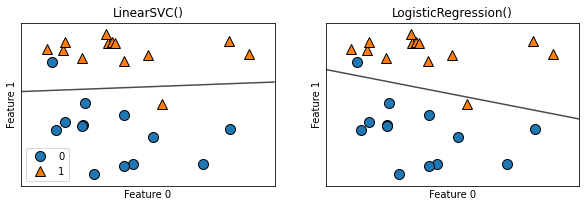

In [2]:
X,y=mglearn.datasets.make_forge()
fig,axes=plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    ax.set_title(clf)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

# LogisticRegression model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train ,X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg=LogisticRegression().fit(X_train,y_train)
print("Train set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Train set score: 0.955
Test set score: 0.951


C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The default c=1 provides quite a good performance with 95% on both training and test set.But as training and test set accuracy are very close, it's likely that we're underfitting.

Let's try to increase c to fit a more flexible model:

In [4]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)
print("Train set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Train set score: 0.948
Test set score: 0.958


C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using C=100 results in lower training set accuracy and increased test set accuracy, confirming our intuition that a more complex model should perform better.

Let's try C=0.01

In [5]:
logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)
print("Train set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Train set score: 0.934
Test set score: 0.930


C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Coefficients learned by LogisticRegression on the Breast cancer dataset for different values of C

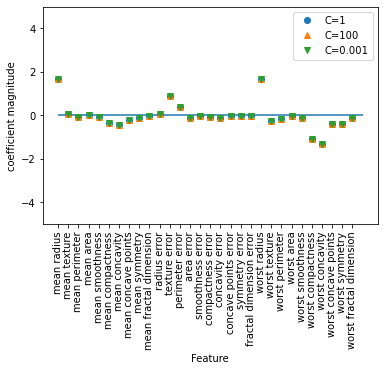

In [6]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'v', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("coefficient magnitude")
plt.legend()